In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pyproj
from pyproj import Proj, transform



ModuleNotFoundError: No module named 'pyproj'

In [3]:
#Cargamos la base normalizada y georeferenciada con USIG (explicar la api)
data = pd.read_csv('caba_usig.csv', error_bad_lines=False)

b'Skipping line 2446: expected 42 fields, saw 44\nSkipping line 6210: expected 42 fields, saw 43\n'
b'Skipping line 19888: expected 42 fields, saw 43\nSkipping line 26180: expected 42 fields, saw 43\n'
b'Skipping line 34153: expected 42 fields, saw 44\n'
b'Skipping line 52980: expected 42 fields, saw 43\nSkipping line 53335: expected 42 fields, saw 44\nSkipping line 53830: expected 42 fields, saw 44\nSkipping line 54771: expected 42 fields, saw 44\nSkipping line 55667: expected 42 fields, saw 43\nSkipping line 55774: expected 42 fields, saw 44\nSkipping line 56491: expected 42 fields, saw 43\n'
b'Skipping line 66098: expected 42 fields, saw 43\nSkipping line 68002: expected 42 fields, saw 43\nSkipping line 68504: expected 42 fields, saw 45\nSkipping line 69438: expected 42 fields, saw 43\n'
b'Skipping line 83588: expected 42 fields, saw 43\n'
b'Skipping line 101221: expected 42 fields, saw 44\nSkipping line 102440: expected 42 fields, saw 43\n'
C:\ProgramData\Anaconda3\lib\site-package

In [4]:
#Dropeamos nulos en la columna con la info geográfica
data.Geocodificación.dropna(axis=0,how="any",inplace=True)
data.dropna(subset=['Geocodificación'], inplace=True)
#confirmamos que la columna sea string
data.Geocodificación.astype(str)

0         POINT(96066.0301716 95686.6825261)
2         POINT(96155.4751897 99645.9593906)
3         POINT(104220.158915 101731.081661)
4          POINT(105148.01366 102641.720146)
5         POINT(105302.234066 103754.311111)
                         ...                
108735    POINT(101573.794012 108471.648951)
108736    POINT(98116.5506102 101038.027211)
108737    POINT(106043.755617 100664.557422)
108738    POINT(101916.535978 106518.995326)
108739    POINT(99997.4230959 102398.307443)
Name: Geocodificación, Length: 104750, dtype: object

In [5]:
data.Geocodificación.isnull().sum()

0

In [6]:
data.Geocodificación

0         POINT(96066.0301716 95686.6825261)
2         POINT(96155.4751897 99645.9593906)
3         POINT(104220.158915 101731.081661)
4          POINT(105148.01366 102641.720146)
5         POINT(105302.234066 103754.311111)
                         ...                
108735    POINT(101573.794012 108471.648951)
108736    POINT(98116.5506102 101038.027211)
108737    POINT(106043.755617 100664.557422)
108738    POINT(101916.535978 106518.995326)
108739    POINT(99997.4230959 102398.307443)
Name: Geocodificación, Length: 104750, dtype: object

In [7]:
#Vemos como splitear la columna para separar lat y long y trabajarlas por separado
x = 'POINT(104503.040008 101268.480111)'
x1 = x.split("(",1)
x2 = x1[1].split(')')
x3 = x2[0].split(' ')
x3

['104503.040008', '101268.480111']

In [8]:
#Armamos las funciones que van a reproyectar lat y long con las herramientas de pyproj
#Cargamos las librerias

#from pyproj import Proj, transform
#import pyproj

x = 'POINT(104503.040008 101268.480111)'

def transfor_lat(x):
    x1 = x.split("(",1)
    x2 = x1[1].split(')')
    x3 = x2[0].split(' ')
    inProj = Proj('+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs')
    outProj = Proj(init='epsg:4326')
    x1, y1 = x3[0], x3[1] 
    x2, y2 = transform(inProj,outProj,x1,y1)
    return (y2)

# def transfor_column_y(x):
#     x1 = x.split("(",1)
#     x2 = x1[1].split(')')
#     x3 = x2[0].split(' ')
#     return x3[1]

print(transfor_lat(x))

def transfor_long(x):
    x1 = x.split("(",1)
    x2 = x1[1].split(')')
    x3 = x2[0].split(' ')
    inProj = Proj('+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs')
    outProj = Proj(init='epsg:4326')
    x1, y1 = x3[0], x3[1] 
    x2, y2 = transform(inProj,outProj,x1,y1)
    return (x2)

# def transfor_column_y(x):
#     x1 = x.split("(",1)
#     x2 = x1[1].split(')')
#     x3 = x2[0].split(' ')
#     return x3[1]

print(transfor_long(x))


NameError: name 'Proj' is not defined

In [271]:
#Seleccionamos solo las columnas que nos aportarian info
data = data[['Nº de cuenta Contrato',
       'CodPostal',
       'Titular', 'Q Módulos','Distrito AySA',
       'Zonal', 'Sup Cub Exp', 'Sup Scub Exp', 'Porc Ph',
       'Cantidad de integrantes del hogar', 'Total de ingresos del hogar',
       'Gastos en vivienda', 'Gastos en salud',
       'Gastos en gas y electricidad ', 'Gastos en servicios optativos',
       'Importe Factura sin TS c/imp',
       'Importe Factura con TS c/imp', 'calle_normal',
       'Geocodificación']]

In [269]:
import warnings
warnings.filterwarnings('ignore')

In [275]:
#Construimos la columna 'lat' con la latitud reproyectada
data['lat'] = data.Geocodificación.apply(lambda x: transfor_lat(x))

In [ ]:
#Construimos la columna 'long' con la longitud reproyectada

data['long'] = data.Geocodificación.apply(lambda x: transfor_long(x))


In [276]:
#Vemos sin sumo las columnas correctamente
# data.lat
# data.long

0        -34.668142
2        -34.632453
3        -34.613656
4        -34.605443
5        -34.595413
            ...    
108735   -34.552902
108736   -34.619910
108737   -34.623261
108738   -34.570504
108739   -34.607650
Name: lat, Length: 104750, dtype: float64

In [185]:
#ARMAMOS EL GEODATAFRAME CON LA PROYECCIÓN QUE UTILIZAREMOS
gdf = gpd.GeoDataFrame(
    datatest, geometry=gpd.points_from_xy(datatest.long, datatest.lat))

In [200]:
#Seteamos la proyección
gdf = gdf.set_crs(epsg=4326)

In [1]:
#Revisamos la proyección
gdf.crs

NameError: name 'gdf' is not defined

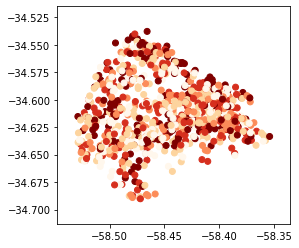

In [196]:
#Ploteamos una muestra test para ver si trabaja
gdftest = gdf.sample(50)

fig, ax = plt.subplots()

ax.set_aspect('equal')

gdftest.plot(ax=ax,column = 'Q Módulos', legend = False, cmap='OrRd', scheme='quantiles')

plt.show();

In [156]:
#DISTINTAS FORMAS DE CAMBIAR LA PROYECCION


# https://gis.stackexchange.com/questions/78838/converting-projected-coordinates-to-lat-lon-using-python
#https://pyproj4.github.io/pyproj/stable/examples.html#using-crs
#https://spatialreference.org/ref/sr-org/7433/proj4/ LAS REFERENCIAS GEO USADAS POR USIG Proyección Gauss-Kruger Bs. As. (GKBA) para la ciudad de Buenos Aires, Argentina.

# from pyproj import Proj, transform
# import pyproj

# inProj = Proj('+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs')
# outProj = Proj(init='epsg:4326')
# x1,y1 = 105170.484872 , 106006.896278
# x2,y2 = transform(inProj,outProj,x1,y1)
# print(y2,x2)

In [51]:
# import pyproj
# print(pyproj.__version__)  # 2.4.1
# print(pyproj.proj_version_str) # 6.2.1

# proj = pyproj.Transformer.from_crs(7433, 4326, always_xy=True)

# x1, y1 = (96066.0301716, 95686.6825261)
# x2, y2 = proj.transform(x1, y1)
# print((x2, y2)) 

In [157]:
# import pyproj
# p = pyproj.Proj("+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs")
# x, y = (96066.0301716, 95686.6825261)
# lon, lat = p(x, y, inverse=True)
# print(lat,lon)

In [158]:
# import pyproj
# p = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
# lon, lat = p(lon, lat, inverse=True)
# print(lat,lon)